# Analysis results

### Table of contents:

* [Evolution in Cybersecurity](#evolution)
* [Runtime](#time)
* [Evolution in Medicine](#medicine)
* [Comparison evolution in Medicine and Cybersecurity](#mix)
* [Top companies if focus in location](#position)

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

## Analysis results evolution Cybersecurity <a class="anchor" id="evolution"></a>

In [25]:
# imputs! 
# change them and teh rest of the code will react accordingly
# please make sure to match the num of companies with the right number of technologies

num_comp = 100
num_tech = 134
flag_cybersecurity = True

In [26]:
if flag_cybersecurity==True:
    name_file_com = f'savings/classes/dict_companies_cybersecurity_{num_comp}.pickle'
    name_file_tech = f'savings/classes/dict_tech_cybersecurity_{num_tech}.pickle'
    name_file_graph = f'savings/networks/cybersecurity_comp_{num_comp}_tech_{num_tech}.gpickle'
    name_M = f'savings/M/cybersecurity_comp_{num_comp}_tech_{num_tech}.npy'

In [27]:
with open(name_file_com, 'rb') as f:
    dict_companies = pickle.load(f)
    
with open(name_file_tech, 'rb') as f:
    dict_tech = pickle.load(f)

B = nx.read_gpickle(name_file_graph)


In [ ]:
df_tech = pd.read_csv("savings/csv_results/cybersecurity/complete_tech_" + str(num_tech) + "_{'previous_investments': 100}.csv")

In [ ]:
df_techrank_tech = df_tech[['final_configuration', 'techrank', ]] # select only the teckrank
df_techrank_tech = df_techrank_tech.rename(columns={'final_configuration': 'name'})
df_techrank_tech = df_techrank_tech.sort_values('techrank', ascending=False)

In [ ]:
df_techrank_tech.head()

In [142]:
params = {
    'axes.labelsize': 22,
    'axes.titlesize':24, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}


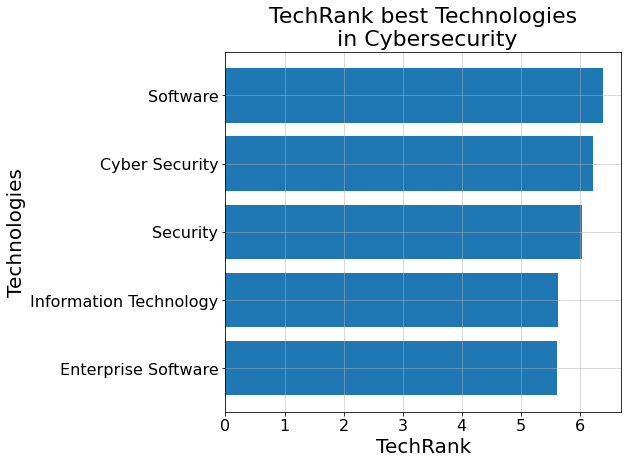

In [228]:
plt.figure(figsize=(10, 8))
plt.rcParams.update(params)
y = df_techrank_tech['name'][:5]
x = df_techrank_tech['techrank'][:5]
plt.barh(y,x)
plt.grid(alpha=0.6)
plt.gca().invert_yaxis()
plt.title("TechRank best Technologies\n in Cybersecurity")
plt.xlabel("TechRank")
plt.ylabel("Technologies")
plt.gcf().subplots_adjust(top=0.75, left=0.35)
plt.savefig("plots/analysis_results/techrank_best_tech_cyber.pdf")
plt.show()

In [146]:
df_comp = pd.read_csv("savings/csv_results/cybersecurity/complete_companies_" + str(num_comp) + "_{'previous_investments': 100, 'crunchbase_rank': 0}.csv")

In [147]:
df_comp = df_comp.rename(columns={'final_configuration': 'name'})
df_comp = df_comp.sort_values('techrank', ascending=False)
df_comp.head()

,initial_position,name,degree,techrank,rank_CB,techrank_normlized,rank_CB_normlized,TeckRank_int
99,98,Axis Security,0,6.78,744.00,10.00,"17,049.00",100.00
98,89,MeWe,0,6.53,"5,701.00",9.63,"12,092.00",99.00
97,99,Lacework,0,6.42,581.00,9.48,"17,212.00",98.00
96,77,CAST Software,0,6.36,"15,622.00",9.39,"2,171.00",97.00
95,95,GAN Integrity,0,6.29,"11,792.00",9.28,"6,001.00",96.00


In [148]:
df_comp[['name', 'TeckRank_int', 'rank_CB_normlized']][:20]

,name,TeckRank_int,rank_CB_normlized
99,Axis Security,100.00,"17,049.00"
98,MeWe,99.00,"12,092.00"
97,Lacework,98.00,"17,212.00"
96,CAST Software,97.00,"2,171.00"
95,GAN Integrity,96.00,"6,001.00"
94,BlueVoyant,95.00,"14,672.00"
93,Mission Secure,94.00,"7,575.00"
92,Immuta,93.00,"15,891.00"
91,x.ai,92.00,"14,429.00"
90,Threatcare,91.00,"9,738.00"


In [149]:
df_techrank_comp = df_comp[['name', 'techrank']] # select only the teckrank
df_techrank_comp = df_techrank_comp.sort_values('techrank', ascending=False)
df_techrank_comp.head()

,name,techrank
99,Axis Security,6.78
98,MeWe,6.53
97,Lacework,6.42
96,CAST Software,6.36
95,GAN Integrity,6.29


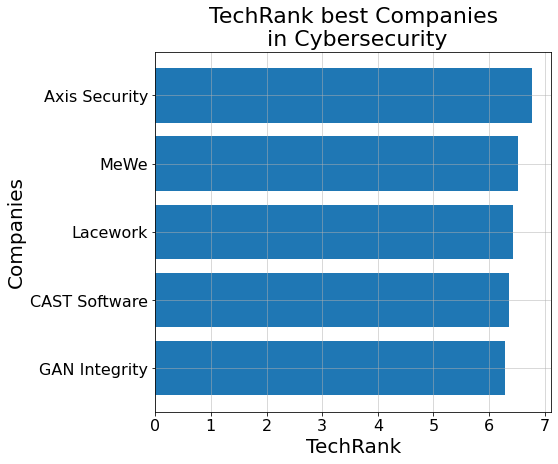

In [229]:
plt.figure(figsize=(10, 8))
plt.rcParams.update(params)
y = df_techrank_comp['name'][:5]
x = df_techrank_comp['techrank'][:5]
plt.barh(y,x)
plt.grid(alpha=0.6)
plt.gca().invert_yaxis()
plt.title("TechRank best Companies\n in Cybersecurity")
plt.xlabel("TechRank")
plt.ylabel("Companies")
plt.gcf().subplots_adjust(top=0.75, left=0.35)
plt.savefig("plots/analysis_results/techrank_best_comp_cyber.pdf")
plt.show()

## Runtime and Number of iterations <a class="anchor" id="time"></a>

In [31]:
preferences_comp = "{'previous_investments': 100, 'crunchbase_rank': 0}"

In [32]:
df = pd.read_csv("savings/useful_datasets/cybersecurity_df_rank_evolu.csv")
df = df[df.select_dtypes(float).notna().any(axis=1)] # clean from Nan
df.head(20)

,Unnamed: 0,Unnamed: 0.1,optimal_beta_tech,time_conv_comp,number_iterations_comp,num_comp,num_tech,time_optimal_par_tech,time_conv_tech,optimal_alpha_comp,optimal_alpha_tech,time_optimal_par_comp,spearman_corr_with_cb,preferences_tech,preferences_comp,number_iterations_tech,time_conv_total,optimal_beta_comp
0,0,0,0.00,0.56,32,10,26,11.75,0.57,-0.36,-2.00,10.21,0.31,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",18,1.13,1.92
1,1,1,-1.04,13.24,100,100,134,35.37,13.72,-0.04,0.52,28.69,0.06,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",155,26.96,0.92
2,2,2,-1.36,470.10,134,499,306,154.79,483.25,-0.08,0.68,189.03,0.19,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",2469,953.34,0.88
3,3,3,0.00,"2,023.18",196,997,371,312.65,"2,392.46",-0.12,-2.00,730.43,0.13,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",194,"4,415.64",0.80
4,4,4,0.00,"2,344.66",302,997,371,340.05,"1,945.21",0.00,-2.00,781.72,-0.25,{'previous_investments': 100},"{'previous_investments': 50, 'crunchbase_rank'...",194,"4,289.86",1.04
5,5,5,-0.12,"4,514.11",180,1494,416,482.18,"4,404.48",-0.12,0.92,"1,372.17",0.13,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",871,"8,918.59",0.80
6,6,6,-2.00,"8,396.26",240,1990,449,656.95,"8,096.69",-0.04,0.56,"2,057.42",0.15,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",5000,"16,492.95",0.92
7,7,7,-1.36,797.78,182,499,306,260.16,816.93,-0.04,0.68,328.73,0.01,{'previous_investments': 100},"{'previous_investments': 0, 'geo_position': 100}",2469,"1,614.71",1.04
8,8,8,-1.36,758.38,196,499,306,277.12,820.20,0.16,0.68,336.73,-0.23,{'previous_investments': 100},"{'previous_investments': 50, 'crunchbase_rank'...",2469,"1,578.58",1.80
9,9,9,-1.36,666.18,135,499,306,278.59,488.34,-0.48,0.68,338.64,0.10,{'previous_investments': 100},"{'previous_investments': 0, 'geo_position': 100}",2469,"1,154.52",0.92


In [33]:
# select right preferences
df = df[df['preferences_comp']==preferences_comp]
df = df.sort_values('num_comp') # order by num como
df

,Unnamed: 0,Unnamed: 0.1,optimal_beta_tech,time_conv_comp,number_iterations_comp,num_comp,num_tech,time_optimal_par_tech,time_conv_tech,optimal_alpha_comp,optimal_alpha_tech,time_optimal_par_comp,spearman_corr_with_cb,preferences_tech,preferences_comp,number_iterations_tech,time_conv_total,optimal_beta_comp
0,0,0,0.00,0.56,32,10,26,11.75,0.57,-0.36,-2.00,10.21,0.31,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",18,1.13,1.92
1,1,1,-1.04,13.24,100,100,134,35.37,13.72,-0.04,0.52,28.69,0.06,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",155,26.96,0.92
2,2,2,-1.36,470.10,134,499,306,154.79,483.25,-0.08,0.68,189.03,0.19,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",2469,953.34,0.88
3,3,3,0.00,"2,023.18",196,997,371,312.65,"2,392.46",-0.12,-2.00,730.43,0.13,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",194,"4,415.64",0.80
5,5,5,-0.12,"4,514.11",180,1494,416,482.18,"4,404.48",-0.12,0.92,"1,372.17",0.13,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",871,"8,918.59",0.80
6,6,6,-2.00,"8,396.26",240,1990,449,656.95,"8,096.69",-0.04,0.56,"2,057.42",0.15,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",5000,"16,492.95",0.92
14,14,14,-2.00,"16,890.26",723,2429,477,"1,071.84","12,779.62",0.04,0.48,"3,230.99",0.28,{'previous_investments': 100},"{'previous_investments': 100, 'crunchbase_rank...",1120,"29,669.88",-1.88


In [34]:
df['name'] = ['comp:' + str(df['num_comp'][i]) + ', tech:' + str(df['num_tech'][i]) for i in df.index]

In [35]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'optimal_beta_tech', 'time_conv_comp',
       'number_iterations_comp', 'num_comp', 'num_tech',
       'time_optimal_par_tech', 'time_conv_tech', 'optimal_alpha_comp',
       'optimal_alpha_tech', 'time_optimal_par_comp', 'spearman_corr_with_cb',
       'preferences_tech', 'preferences_comp', 'number_iterations_tech',
       'time_conv_total', 'optimal_beta_comp', 'name'],
      dtype='object')

**Optimal parameters**

In [36]:
df_parameters = df[['num_comp','num_tech', 'optimal_alpha_comp', 'optimal_beta_comp', 'optimal_alpha_tech', 'optimal_beta_tech']]
df_parameters

,num_comp,num_tech,optimal_alpha_comp,optimal_beta_comp,optimal_alpha_tech,optimal_beta_tech
0,10,26,-0.36,1.92,-2.00,0.00
1,100,134,-0.04,0.92,0.52,-1.04
2,499,306,-0.08,0.88,0.68,-1.36
3,997,371,-0.12,0.80,-2.00,0.00
5,1494,416,-0.12,0.80,0.92,-0.12
6,1990,449,-0.04,0.92,0.56,-2.00
14,2429,477,0.04,-1.88,0.48,-2.00


**Iterations**

In [37]:
df_iterations = df[['num_comp','num_tech', 'number_iterations_comp', 'number_iterations_tech']]
df_iterations

,num_comp,num_tech,number_iterations_comp,number_iterations_tech
0,10,26,32,18
1,100,134,100,155
2,499,306,134,2469
3,997,371,196,194
5,1494,416,180,871
6,1990,449,240,5000
14,2429,477,723,1120


In [38]:
pd.options.display.float_format = "{:,.2f}".format

In [39]:
df_time = df[['name', 'num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech', 'time_conv_total']]
df_time.head(20)

,name,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech,time_conv_total
0,"comp:10, tech:26",10,26,10.21,11.75,0.56,0.57,1.13
1,"comp:100, tech:134",100,134,28.69,35.37,13.24,13.72,26.96
2,"comp:499, tech:306",499,306,189.03,154.79,470.10,483.25,953.34
3,"comp:997, tech:371",997,371,730.43,312.65,"2,023.18","2,392.46","4,415.64"
5,"comp:1494, tech:416",1494,416,"1,372.17",482.18,"4,514.11","4,404.48","8,918.59"
6,"comp:1990, tech:449",1990,449,"2,057.42",656.95,"8,396.26","8,096.69","16,492.95"
14,"comp:2429, tech:477",2429,477,"3,230.99","1,071.84","16,890.26","12,779.62","29,669.88"


**Run-time**

In [40]:
df_time[['num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech']]

,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech
0,10,26,10.21,11.75,0.56,0.57
1,100,134,28.69,35.37,13.24,13.72
2,499,306,189.03,154.79,470.10,483.25
3,997,371,730.43,312.65,"2,023.18","2,392.46"
5,1494,416,"1,372.17",482.18,"4,514.11","4,404.48"
6,1990,449,"2,057.42",656.95,"8,396.26","8,096.69"
14,2429,477,"3,230.99","1,071.84","16,890.26","12,779.62"


In [41]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

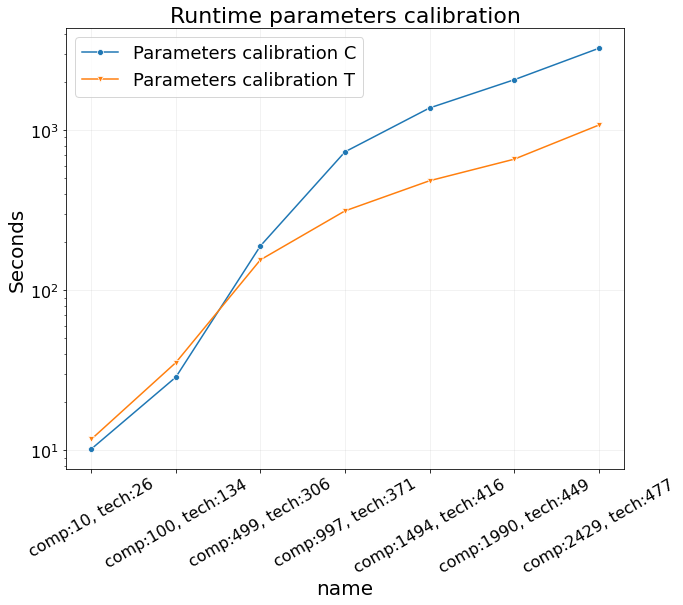

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
plt.rcParams.update(params)
sns.lineplot(x='name', y='time_optimal_par_comp', marker='o', data = df_time)
sns.lineplot(x='name', y='time_optimal_par_tech', marker='v', data = df_time)
ax.set_yscale("log")
plt.legend(['Parameters calibration C', 'Parameters calibration T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime parameters calibration")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_parameters_cyber.pdf")
plt.show()

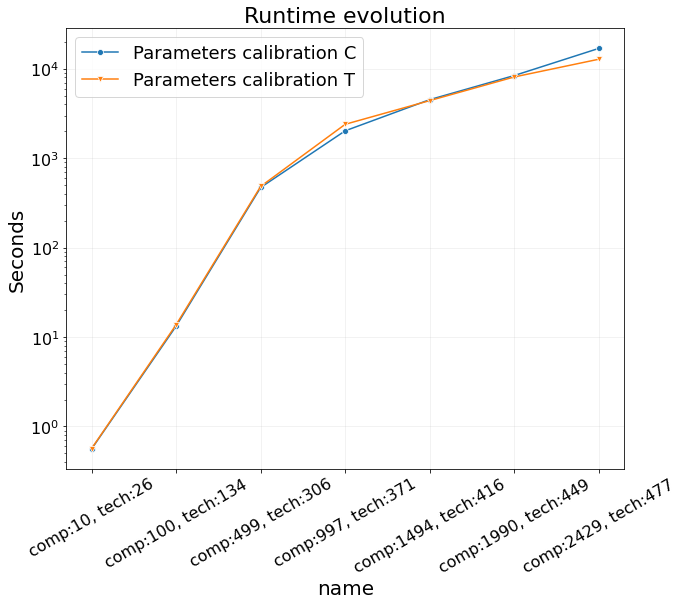

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
sns.lineplot(x='name', y='time_conv_comp', marker='o', data = df_time)
sns.lineplot(x='name', y='time_conv_tech', marker='v', data = df_time)
ax.set_yscale("log")
plt.legend(['Parameters calibration C', 'Parameters calibration T', 'Random walk C', 'Random walk T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime evolution")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_evolution_cyber.pdf")
plt.show()

In [44]:
df_time_tech = df_time[['num_tech', 'time_optimal_par_tech', 'time_conv_tech']]
df_time_tech = df_time_tech.set_index('num_tech')
df_time_comp = df_time[['num_comp', 'time_optimal_par_comp', 'time_conv_comp']]
df_time_comp = df_time_comp.set_index('num_comp')

In [45]:
df_time_comp

,time_optimal_par_comp,time_conv_comp
num_comp,,
10,10.21,0.56
100,28.69,13.24
499,189.03,470.10
997,730.43,"2,023.18"
1494,"1,372.17","4,514.11"
1990,"2,057.42","8,396.26"
2429,"3,230.99","16,890.26"


In [38]:
df_time_tech

,time_optimal_par_tech,time_conv_tech
num_tech,,
26,11.75,0.57
134,35.37,13.72
306,154.79,483.25
371,312.65,"2,392.46"
416,482.18,"4,404.48"
449,656.95,"8,096.69"
477,"1,071.84","12,779.62"


In [39]:

plt.rcParams.update(params)

In [40]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

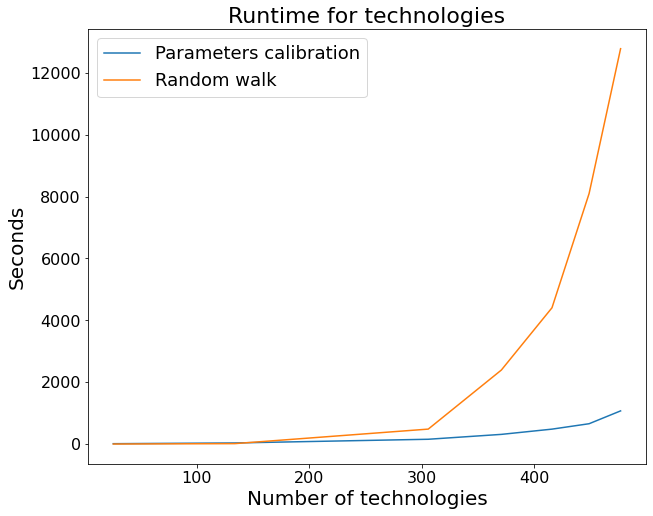

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(df_time_tech.index, df_time_tech['time_optimal_par_tech'])
plt.rcParams.update(params)
plt.plot(df_time_tech.index, df_time_tech['time_conv_tech'])
plt.legend(['Parameters calibration', 'Random walk'])
plt.title("Runtime for technologies")
plt.ylabel("Seconds")
plt.xlabel("Number of technologies")
plt.savefig("plots/analysis_results/runtime_tech.pdf")
plt.show()

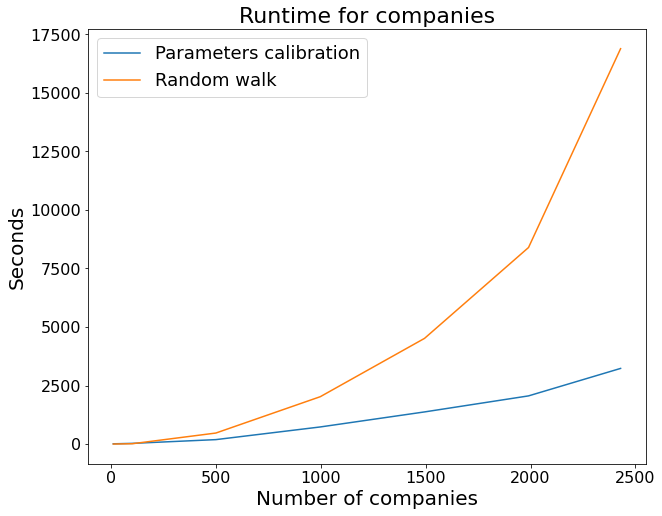

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(df_time_comp.index, df_time_comp['time_optimal_par_comp'])
plt.plot(df_time_comp.index, df_time_comp['time_conv_comp'])
plt.legend(['Parameters calibration', 'Random walk'])
plt.title("Runtime for companies")
plt.ylabel("Seconds")
plt.xlabel("Number of companies")
plt.show()

In [43]:
df_time_comp['entity'] = ['Companies' for i in range(len(df_time_comp))]
a = df_time_comp[['time_optimal_par_comp', 'entity']]
a = a.rename(columns={'time_optimal_par_comp': 'time'})
a

,time,entity
num_comp,,
10,10.21,Companies
100,28.69,Companies
499,189.03,Companies
997,730.43,Companies
1494,"1,372.17",Companies
1990,"2,057.42",Companies
2429,"3,230.99",Companies


In [44]:
df_time_tech['entity'] = ['Technologies' for i in range(len(df_time_tech))]
b = df_time_tech[['time_optimal_par_tech', 'entity']]
b = b.rename(columns={'time_optimal_par_tech': 'time'})
b

,time,entity
num_tech,,
26,11.75,Technologies
134,35.37,Technologies
306,154.79,Technologies
371,312.65,Technologies
416,482.18,Technologies
449,656.95,Technologies
477,"1,071.84",Technologies


In [45]:
a = a.append(b)
a = a.reset_index()
a

,index,time,entity
0,10,10.21,Companies
1,100,28.69,Companies
2,499,189.03,Companies
3,997,730.43,Companies
4,1494,"1,372.17",Companies
5,1990,"2,057.42",Companies
6,2429,"3,230.99",Companies
7,26,11.75,Technologies
8,134,35.37,Technologies
9,306,154.79,Technologies


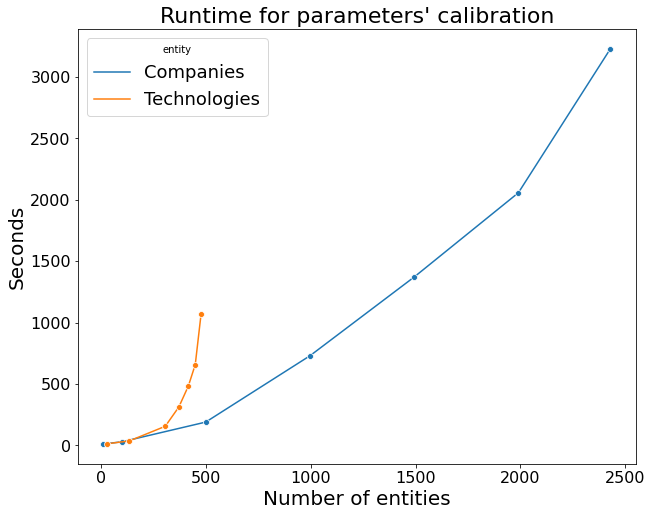

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x='index', y="time",
            hue="entity",
            data=a,  
            marker='o');
plt.title("Runtime for parameters' calibration")
plt.xlabel("Number of entities")
plt.ylabel("Seconds")
plt.savefig("plots/analysis_results/scatter_plot_parameters_calibration.pdf")

## Medicine <a class="anchor" id="medicine"></a>

In [2]:
df_medicine = pd.read_csv("savings/useful_datasets/df_rank_evolu.csv")
df_medicine = df_medicine.drop('Unnamed: 0', axis=1)
df_medicine = df_medicine[df_medicine.select_dtypes(float).notna().any(axis=1)] # clean from Nan
df_medicine = df_medicine.sort_values('num_comp')
df_medicine.head(20)

,time_optimal_par_comp,num_tech,optimal_alpha_comp,preferences_comp,number_iterations_tech,time_conv_tech,time_conv_total,optimal_beta_comp,time_optimal_par_tech,preferences_tech,spearman_corr_with_cb,number_iterations_comp,num_comp,optimal_beta_tech,time_conv_comp,optimal_alpha_tech,name
0,10.678098,32,1.48,"{'previous_investments': 100, 'crunchbase_rank...",31,0.670836,1.256010,0.32,12.678175,{'previous_investments': 100},-0.454545,21,10,-2.00,0.585174,0.64,"comp:10, tech:32"
1,39.080993,131,-0.24,"{'previous_investments': 100, 'crunchbase_rank...",312,15.934293,30.173712,0.52,45.895848,{'previous_investments': 100},0.334570,107,100,-0.56,14.239419,0.80,"comp:100, tech:131"
2,161.222578,199,-0.28,"{'previous_investments': 100, 'crunchbase_rank...",44,246.279384,496.641919,0.32,100.231776,{'previous_investments': 100},0.044916,61,500,0.00,250.362536,-2.00,"comp:500, tech:199"
3,579.637824,254,-0.04,"{'previous_investments': 100, 'crunchbase_rank...",5000,1237.268699,2630.899076,1.04,216.891454,{'previous_investments': 100},-0.131404,5000,999,-0.92,1393.630377,1.48,"comp:999, tech:254"
4,1109.841080,290,-0.16,"{'previous_investments': 100, 'crunchbase_rank...",50,2724.170279,5507.635715,0.56,328.628821,{'previous_investments': 100},0.066296,63,1499,0.20,2783.465436,-2.00,"comp:1499, tech:290"
5,1814.787641,326,-0.12,"{'previous_investments': 100, 'crunchbase_rank...",140,5311.529262,10622.011689,0.64,473.282557,{'previous_investments': 100},0.124843,69,1999,0.00,5310.482427,-2.00,"comp:1999, tech:326"
6,3306.564834,368,-0.12,"{'previous_investments': 100, 'crunchbase_rank...",150,14652.662794,28840.781014,0.64,776.118868,{'previous_investments': 100},0.114435,79,2997,0.00,14188.118220,-2.00,"comp:2997, tech:368"
7,10524.183149,437,0.00,"{'previous_investments': 100, 'crunchbase_rank...",419,45887.160453,90364.965323,-2.00,4405.328068,{'previous_investments': 100},0.211304,114,4996,1.08,44477.804870,0.52,"comp:4996, tech:437"


In [3]:
#df_medicine = df_medicine.drop(3, axis=0)
df_medicine.head(20)

,time_optimal_par_comp,num_tech,optimal_alpha_comp,preferences_comp,number_iterations_tech,time_conv_tech,time_conv_total,optimal_beta_comp,time_optimal_par_tech,preferences_tech,spearman_corr_with_cb,number_iterations_comp,num_comp,optimal_beta_tech,time_conv_comp,optimal_alpha_tech,name
0,10.678098,32,1.48,"{'previous_investments': 100, 'crunchbase_rank...",31,0.670836,1.256010,0.32,12.678175,{'previous_investments': 100},-0.454545,21,10,-2.00,0.585174,0.64,"comp:10, tech:32"
1,39.080993,131,-0.24,"{'previous_investments': 100, 'crunchbase_rank...",312,15.934293,30.173712,0.52,45.895848,{'previous_investments': 100},0.334570,107,100,-0.56,14.239419,0.80,"comp:100, tech:131"
2,161.222578,199,-0.28,"{'previous_investments': 100, 'crunchbase_rank...",44,246.279384,496.641919,0.32,100.231776,{'previous_investments': 100},0.044916,61,500,0.00,250.362536,-2.00,"comp:500, tech:199"
3,579.637824,254,-0.04,"{'previous_investments': 100, 'crunchbase_rank...",5000,1237.268699,2630.899076,1.04,216.891454,{'previous_investments': 100},-0.131404,5000,999,-0.92,1393.630377,1.48,"comp:999, tech:254"
4,1109.841080,290,-0.16,"{'previous_investments': 100, 'crunchbase_rank...",50,2724.170279,5507.635715,0.56,328.628821,{'previous_investments': 100},0.066296,63,1499,0.20,2783.465436,-2.00,"comp:1499, tech:290"
5,1814.787641,326,-0.12,"{'previous_investments': 100, 'crunchbase_rank...",140,5311.529262,10622.011689,0.64,473.282557,{'previous_investments': 100},0.124843,69,1999,0.00,5310.482427,-2.00,"comp:1999, tech:326"
6,3306.564834,368,-0.12,"{'previous_investments': 100, 'crunchbase_rank...",150,14652.662794,28840.781014,0.64,776.118868,{'previous_investments': 100},0.114435,79,2997,0.00,14188.118220,-2.00,"comp:2997, tech:368"
7,10524.183149,437,0.00,"{'previous_investments': 100, 'crunchbase_rank...",419,45887.160453,90364.965323,-2.00,4405.328068,{'previous_investments': 100},0.211304,114,4996,1.08,44477.804870,0.52,"comp:4996, tech:437"


In [4]:
#df_medicine.to_csv("savings/useful_datasets/df_rank_evolu.csv")

In [5]:
df_medicine['name'] = ['comp:' + str(df_medicine['num_comp'][i]) + ', tech:' + str(df_medicine['num_tech'][i]) for i in df_medicine.index]

In [6]:
df_medicine.columns

Index(['time_optimal_par_comp', 'num_tech', 'optimal_alpha_comp',
       'preferences_comp', 'number_iterations_tech', 'time_conv_tech',
       'time_conv_total', 'optimal_beta_comp', 'time_optimal_par_tech',
       'preferences_tech', 'spearman_corr_with_cb', 'number_iterations_comp',
       'num_comp', 'optimal_beta_tech', 'time_conv_comp', 'optimal_alpha_tech',
       'name'],
      dtype='object')

**Optimal parameters**

In [7]:
df_parameters_medicine = df_medicine[['num_comp','num_tech', 'optimal_alpha_comp', 'optimal_beta_comp', 'optimal_alpha_tech', 'optimal_beta_tech']]
df_parameters_medicine

,num_comp,num_tech,optimal_alpha_comp,optimal_beta_comp,optimal_alpha_tech,optimal_beta_tech
0,10,32,1.48,0.32,0.64,-2.00
1,100,131,-0.24,0.52,0.80,-0.56
2,500,199,-0.28,0.32,-2.00,0.00
3,999,254,-0.04,1.04,1.48,-0.92
4,1499,290,-0.16,0.56,-2.00,0.20
5,1999,326,-0.12,0.64,-2.00,0.00
6,2997,368,-0.12,0.64,-2.00,0.00
7,4996,437,0.00,-2.00,0.52,1.08


**Iterations**

In [8]:
df_iterations_medicine = df_medicine[['num_comp','num_tech', 'number_iterations_comp', 'number_iterations_tech']]
df_iterations_medicine

,num_comp,num_tech,number_iterations_comp,number_iterations_tech
0,10,32,21,31
1,100,131,107,312
2,500,199,61,44
3,999,254,5000,5000
4,1499,290,63,50
5,1999,326,69,140
6,2997,368,79,150
7,4996,437,114,419


In [9]:
pd.options.display.float_format = "{:,.2f}".format

In [10]:
df_time_medicine = df_medicine[['name', 'num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech', 'time_conv_total']]
df_time_medicine.head(20)

,name,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech,time_conv_total
0,"comp:10, tech:32",10,32,10.68,12.68,0.59,0.67,1.26
1,"comp:100, tech:131",100,131,39.08,45.90,14.24,15.93,30.17
2,"comp:500, tech:199",500,199,161.22,100.23,250.36,246.28,496.64
3,"comp:999, tech:254",999,254,579.64,216.89,"1,393.63","1,237.27","2,630.90"
4,"comp:1499, tech:290",1499,290,"1,109.84",328.63,"2,783.47","2,724.17","5,507.64"
5,"comp:1999, tech:326",1999,326,"1,814.79",473.28,"5,310.48","5,311.53","10,622.01"
6,"comp:2997, tech:368",2997,368,"3,306.56",776.12,"14,188.12","14,652.66","28,840.78"
7,"comp:4996, tech:437",4996,437,"10,524.18","4,405.33","44,477.80","45,887.16","90,364.97"


**Run-time**

In [11]:
df_time_medicine[['num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech']]

,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech
0,10,32,10.68,12.68,0.59,0.67
1,100,131,39.08,45.90,14.24,15.93
2,500,199,161.22,100.23,250.36,246.28
3,999,254,579.64,216.89,"1,393.63","1,237.27"
4,1499,290,"1,109.84",328.63,"2,783.47","2,724.17"
5,1999,326,"1,814.79",473.28,"5,310.48","5,311.53"
6,2997,368,"3,306.56",776.12,"14,188.12","14,652.66"
7,4996,437,"10,524.18","4,405.33","44,477.80","45,887.16"


In [12]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

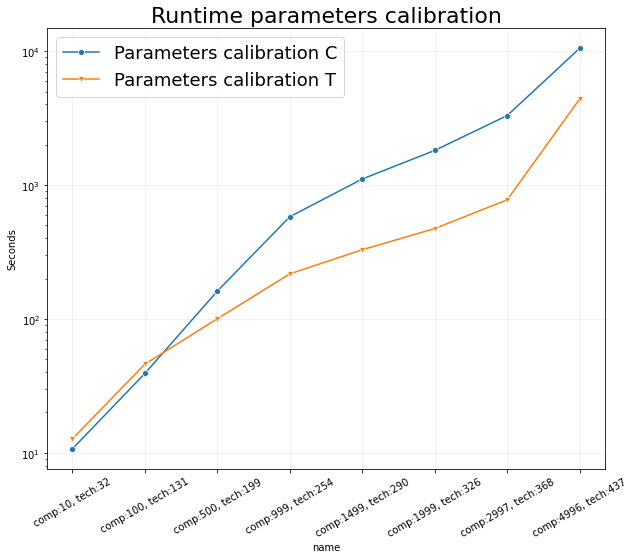

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
plt.rcParams.update(params)
sns.lineplot(x='name', y='time_optimal_par_comp', marker='o', data = df_time_medicine)
sns.lineplot(x='name', y='time_optimal_par_tech', marker='v', data = df_time_medicine)
ax.set_yscale("log")
plt.legend(['Parameters calibration C', 'Parameters calibration T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime parameters calibration")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_parameters_medicine.pdf")
plt.show()

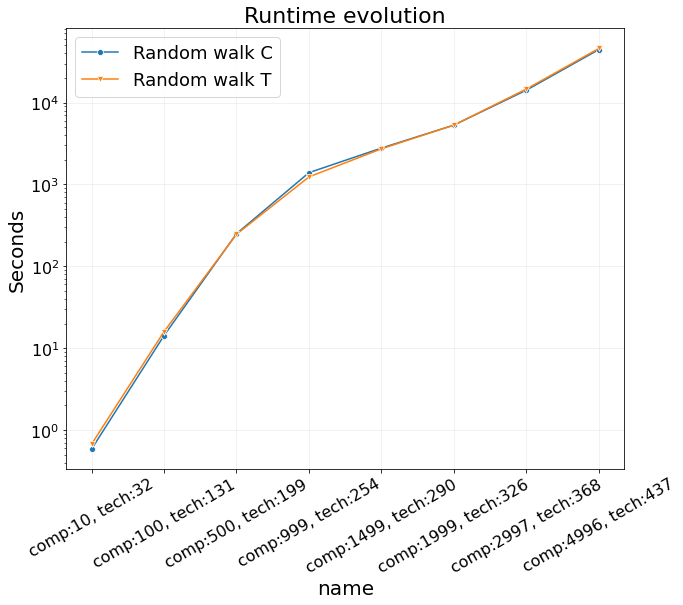

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
sns.lineplot(x='name', y='time_conv_comp', marker='o', data = df_time_medicine)
sns.lineplot(x='name', y='time_conv_tech', marker='v', data = df_time_medicine)
ax.set_yscale("log")
plt.legend(['Random walk C', 'Random walk T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime evolution")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_evolution_medicine.pdf")
plt.show()

In [15]:
df_time_tech_medicine = df_time_medicine[['num_tech', 'time_optimal_par_tech', 'time_conv_tech']]
df_time_tech_medicine = df_time_tech_medicine.set_index('num_tech')
df_time_comp_medicine = df_time_medicine[['num_comp', 'time_optimal_par_comp', 'time_conv_comp']]
df_time_comp_medicine = df_time_comp_medicine.set_index('num_comp')

In [16]:
df_time_comp_medicine

,time_optimal_par_comp,time_conv_comp
num_comp,,
10,10.68,0.59
100,39.08,14.24
500,161.22,250.36
999,579.64,"1,393.63"
1499,"1,109.84","2,783.47"
1999,"1,814.79","5,310.48"
2997,"3,306.56","14,188.12"
4996,"10,524.18","44,477.80"


In [17]:
df_time_tech_medicine

,time_optimal_par_tech,time_conv_tech
num_tech,,
32,12.68,0.67
131,45.90,15.93
199,100.23,246.28
254,216.89,"1,237.27"
290,328.63,"2,724.17"
326,473.28,"5,311.53"
368,776.12,"14,652.66"
437,"4,405.33","45,887.16"


In [18]:
plt.rcParams.update(params)

In [19]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

In [20]:
df_time_comp_medicine['entity'] = ['Companies' for i in range(len(df_time_comp_medicine))]
a = df_time_comp_medicine[['time_optimal_par_comp', 'entity']]
a = a.rename(columns={'time_optimal_par_comp': 'time'})
a

,time,entity
num_comp,,
10,10.68,Companies
100,39.08,Companies
500,161.22,Companies
999,579.64,Companies
1499,"1,109.84",Companies
1999,"1,814.79",Companies
2997,"3,306.56",Companies
4996,"10,524.18",Companies


In [21]:
df_time_tech_medicine['entity'] = ['Technologies' for i in range(len(df_time_tech_medicine))]
b = df_time_tech_medicine[['time_optimal_par_tech', 'entity']]
b = b.rename(columns={'time_optimal_par_tech': 'time'})
b

,time,entity
num_tech,,
32,12.68,Technologies
131,45.90,Technologies
199,100.23,Technologies
254,216.89,Technologies
290,328.63,Technologies
326,473.28,Technologies
368,776.12,Technologies
437,"4,405.33",Technologies


In [22]:
a_medicine = a.append(b)
a_medicine = a_medicine.reset_index()
a_medicine

,index,time,entity
0,10,10.68,Companies
1,100,39.08,Companies
2,500,161.22,Companies
3,999,579.64,Companies
4,1499,"1,109.84",Companies
5,1999,"1,814.79",Companies
6,2997,"3,306.56",Companies
7,4996,"10,524.18",Companies
8,32,12.68,Technologies
9,131,45.90,Technologies


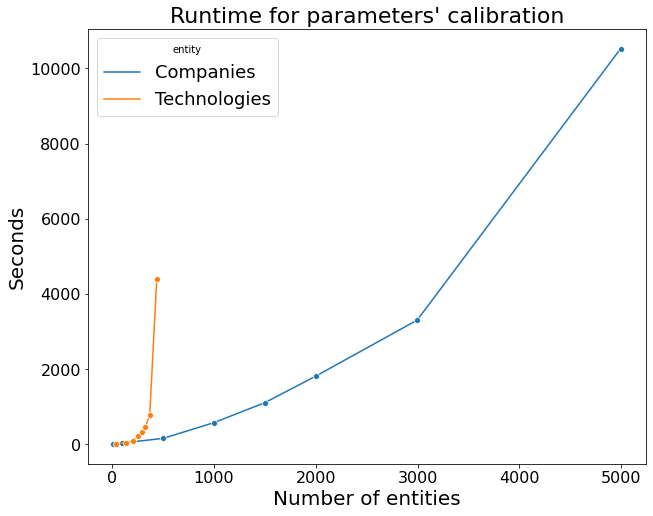

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x='index', y="time",
            hue="entity",
            data=a_medicine,  
            marker='o');
plt.title("Runtime for parameters' calibration")
plt.xlabel("Number of entities")
plt.ylabel("Seconds")
plt.savefig("plots/analysis_results/scatter_plot_parameters_calibration_medicine.pdf")

## Comparison evolution in medicine and cybersecurity <a class="anchor" id="mix"></a>

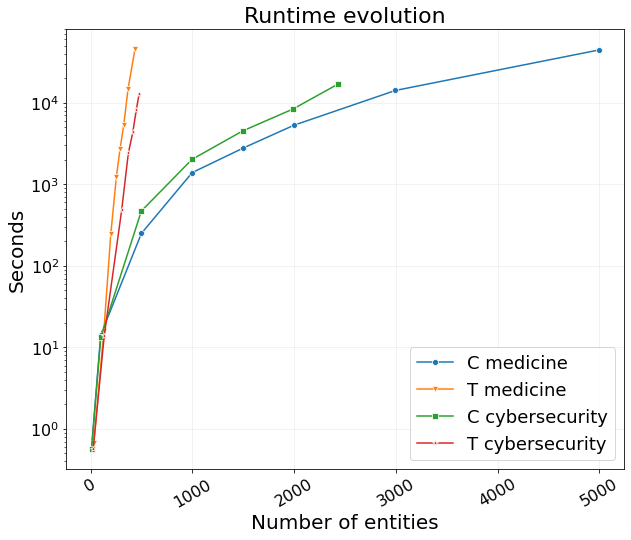

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
sns.lineplot(x='num_comp', y='time_conv_comp', marker='o', data = df_time_medicine)
sns.lineplot(x='num_tech', y='time_conv_tech', marker='v', data = df_time_medicine)
sns.lineplot(x='num_comp', y='time_conv_comp', marker='s', data = df_time)
sns.lineplot(x='num_tech', y='time_conv_tech', marker='*', data = df_time)
ax.set_yscale("log")
plt.legend(['C medicine', 'T medicine','C cybersecurity', 'T cybersecurity'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.xlabel('Number of entities')
plt.title("Runtime evolution")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_evolution_medicine_cyber.pdf")
plt.show()

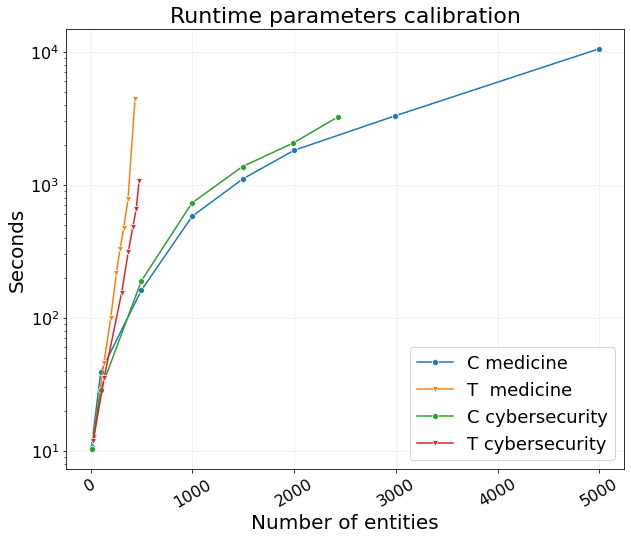

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
plt.rcParams.update(params)
sns.lineplot(x='num_comp', y='time_optimal_par_comp', marker='o', data = df_time_medicine)
sns.lineplot(x='num_tech', y='time_optimal_par_tech', marker='v', data = df_time_medicine)
sns.lineplot(x='num_comp', y='time_optimal_par_comp', marker='o', data = df_time)
sns.lineplot(x='num_tech', y='time_optimal_par_tech', marker='v', data = df_time)
ax.set_yscale("log")
plt.legend(['C medicine', 'T  medicine', 'C cybersecurity', 'T cybersecurity'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.xlabel('Number of entities')
plt.title("Runtime parameters calibration")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_parameters_medicine_cyber.pdf")
plt.show()

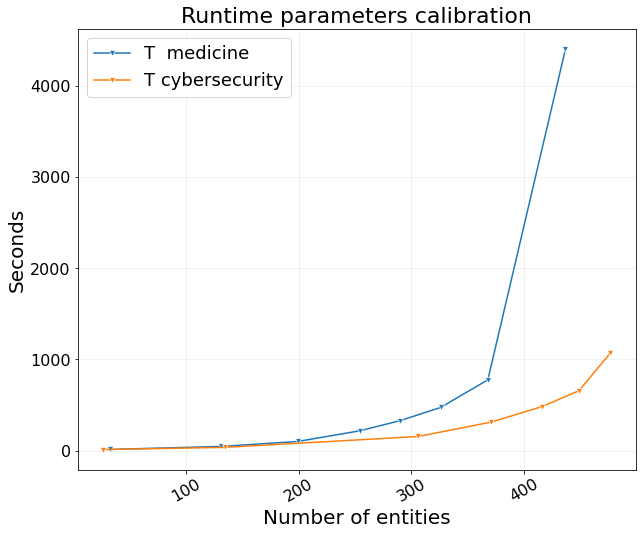

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
plt.rcParams.update(params)
sns.lineplot(x='num_tech', y='time_optimal_par_tech', marker='v', data = df_time_medicine)
sns.lineplot(x='num_tech', y='time_optimal_par_tech', marker='v', data = df_time)
#ax.set_yscale("log")
plt.legend(['T  medicine', 'T cybersecurity'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.xlabel('Number of entities')
plt.title("Runtime parameters calibration")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_parameters_medicine_cyber.pdf")
plt.show()

## Focus on the geographical position <a class="anchor" id="position"></a>

In [359]:
num_comp = 499

In [360]:
name_file_com = f"savings/classes/dict_companies_cybersecurity_{num_comp}.pickle"
with open(name_file_com, 'rb') as f:
    dict_companies = pickle.load(f)

In [363]:
df = pd.read_csv(f"savings/csv_results/cybersecurity_only_location/complete_companies_{num_comp}_San_Francisco.csv")

In [364]:
df.final_configuration = df.final_configuration.values[::-1]

In [365]:
position = df["final_configuration"]
companies = list(position.values)

In [366]:
places = [[dict_companies[name].location["region"],dict_companies[name].location["country_code"]] for name in companies for name in companies if isinstance(dict_companies[name].location["country_code"], float)==False]# if dict_companies[name].location["country_code"]=='USA']

In [374]:
places[2] = ['California', 'USA']

In [375]:
print(places[:20])

[['California', 'USA'], ['Illinois', 'USA'], ['California', 'USA'], ['Beijing', 'CHN'], ['Arizona', 'USA'], ['Pais Vasco', 'ESP'], ['Berlin', 'DEU'], ['Nordrhein-Westfalen', 'DEU'], ['Kent', 'GBR'], ['Arizona', 'USA'], ['California', 'USA'], ['Ontario', 'CAN'], ['Nordrhein-Westfalen', 'DEU'], ['Nebraska', 'USA'], ['Wisconsin', 'USA'], ['Massachusetts', 'USA'], ['Central Region', 'SGP'], ['California', 'USA'], ['Alberta', 'CAN'], ['California', 'USA']]


In [319]:
df = pd.read_csv(f"savings/csv_results/cybersecurity_only_location/complete_companies_{num_comp}_New_York.csv")

In [320]:
df.head()
df.final_configuration = df.final_configuration.values[::-1]

In [321]:
position = df["final_configuration"]
companies = list(position.values)

In [335]:
places_ny = [[dict_companies[name].location["region"],dict_companies[name].location["country_code"]] for name in companies if isinstance(dict_companies[name].location["country_code"], float)==False]# if dict_companies[name].location["country_code"]=='USA']

In [343]:
print(places_ny[:12])

[['New York', 'USA'], ['Massachusetts', 'USA'], ['Quebec', 'CAN'], ['California', 'USA'], ['Central Region', 'Singapore'], ['California', 'USA'], ['Nordrhein-Westfalen', 'DEU'], ['Wisconsin', 'USA'], ['Nebraska', 'USA'], ['Arizona', 'USA'], ['Ontario', 'CAN'], ['California', 'USA']]
